In [1]:
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex

initialization  
$ \newcommand{\E}{\mathbb{E}}$  
$ \newcommand{\V}{\mathbb{V}}$
$ \newcommand{\P}{\mathbb{P}}$

Expectation
======



Variance
========

* $\operatorname{Var}(X) = \operatorname{E}\left[(X - \mu)^2 \right] = 
\int (X - \mu)^2 dF(x)$

* $\operatorname{Var}(X) = \operatorname{Cov}(X, X)$

* $$
\begin{align}
\operatorname{Var}(X) &= \operatorname{E}\left[(X - \operatorname{E}[X])^2\right] \\
&= \operatorname{E}\left[X^2 - 2X\operatorname{E}[X] + (\operatorname{E}[X])^2\right] \\
&= \operatorname{E}\left[X^2\right] - 2\operatorname{E}[X]\operatorname{E}[X] + (\operatorname{E}[X])^2 \\
&= \operatorname{E}\left[X^2 \right] - (\operatorname{E}[X])^2
\end{align}
$$
That is, $E\left[X^2\right] - (E[X])^2$, which can be remembered as "mean of square minus square of mean".

* For continuous random variables,  
$\operatorname{Var}(X) =\sigma^2 =\int (x-\mu)^2 \, f(x) \, dx\, =\int x^2 \, f(x) \, dx\, - \mu^2$
If expected value doesn't exist, so does the variance.  
Ex. 
  * Cauchy distribution
  * Pareto distribution with $k \in (1, 2]$

* For discrete random variables,  
$$
\operatorname{Var}(X) = \sum_{i=1}^n p_i\cdot(x_i - \mu)^2 = \sum_{i=1}^n p_i x_i ^2- \mu^2,
$$
  * If the $X_i \sim F$ for some F, then  
  $$ \operatorname{Var}(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2. \text{where } \mu = \frac{1}{n}\sum_{i=1}^n x_i $$
  * The mean in the formula can be avoided as:  
  $$ \operatorname{Var}(X) = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \frac{1}{2}(x_i - x_j)^2 = \frac{1}{n^2}\sum_i \sum_{j>i} (x_i-x_j)^2.$$
  
* Transformations:  
  * **Offset: ** $\operatorname{Var}(X+a) = \operatorname{Var}(X)$
  * **Scaling**: $\operatorname{Var}(aX) = a^2 \operatorname{Var}(X)$
  * $\operatorname{Var}(aX+bY)=a^2\operatorname{Var}(X)+b^2\operatorname{Var}(Y)+2ab\, \operatorname{Cov}(X,Y)$
  * $\operatorname{Var}(aX-bY)=a^2\operatorname{Var}(X)+b^2\operatorname{Var}(Y)-2ab\, \operatorname{Cov}(X,Y)$
  * **Sum**: $\operatorname{Var}\left(\sum_{i=1}^N X_i\right)=\sum_{i,j=1}^N\operatorname{Cov}(X_i,X_j)\\=\sum_{i=1}^N\operatorname{Var}(X_i)+\sum_{i\ne j}\operatorname{Cov}(X_i,X_j).$
  * **Linear combination**: $$
    \begin{align}
\operatorname{Var}\left( \sum_{i=1}^N a_iX_i\right) &=\sum_{i,j=1}^{N} a_ia_j\operatorname{Cov}(X_i,X_j) \\
&=\sum_{i=1}^N a_i^2\operatorname{Var}(X_i)+\sum_{i\not=j}a_ia_j\operatorname{Cov}(X_i,X_j)\\
& =\sum_{i=1}^N a_i^2\operatorname{Var}(X_i)+2\sum_{1\le i<j\le N}a_ia_j\operatorname{Cov}(X_i,X_j).
\end{align}
    $$
    
* Uncorrelated RVs:  
  * If $\operatorname{Cov}(X_i,X_j)=0\ ,\ \forall\ (i\ne j)$, then $\{X_i\}$ are uncorrelated. This then leads to  
  $\operatorname{Var}\left(\sum_{i=1}^N X_i\right)=\sum_{i=1}^N\operatorname{Var}(X_i)$
  * If RVs are independent, then they are uncorrelated. Note that, independence is sufficient but not necessary for the variance of the sum to equal the sum of the variances.
  * $$\operatorname{Var}\left(\overline{X}\right) = \operatorname{Var}\left(\frac {1} {n}\sum_{i=1}^n X_i\right) = \frac {1} {n^2}\sum_{i=1}^n \operatorname{Var}\left(X_i\right) = \frac {\sigma^2} {n}$$
  
* Sum of correlated variables  
  * If the RVs have equal variance $\sigma^2$ and the average correlation of the distinct variables is $\rho$, then,  
  $$\operatorname{Var}(\overline{X}) = \frac {\sigma^2} {n} + \frac {n-1} {n} \rho \sigma^2$$
  * Thus, variance of the mean increases with the average of the correlations.
  * In other words, additional correlated observations are not as effective as additional independent observations at reducing the uncertainty of the mean.
  * Convergence:  
    * $\lim_{n \to \infty} \operatorname{Var}(\overline{X}) = \rho \sigma^2$
    * This makes clear that the sample mean of correlated variables does not generally converge to the population mean, even though the [Law of large numbers](http://www.wikiwand.com/en/Law_of_large_numbers) states that the sample mean will converge for independent variables.

Bessel's Correction
=====================

Sample Variance = $\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \mu)^2$

**Caveats**  
* It does not yield an unbiased estimator of standard deviation.
  * while the sample variance (using Bessel's correction) is an unbiased estimate of the population variance, its square root, the sample standard deviation, is a biased estimate of the population standard deviation; because the square root is a concave function, the bias is downward, by Jensen's inequality. There is no general formula for an unbiased estimator of the population standard deviation, though there are correction factors for particular distributions, such as the normal; see unbiased estimation of standard deviation for details. An approximation for the exact correction factor for the normal distribution is given by using n − 1.5 in the formula: the bias decays quadratically (rather than linearly, as in the uncorrected form and Bessel's corrected form).
  
* The corrected estimator often has worse (higher) mean squared error (MSE) than the uncorrected estimator, and never has the minimum MSE
  * A different scale factor can always be chosen to minimize MSE. The optimal value depends on excess kurtosis, as discussed in [mean squared error: variance](http://www.wikiwand.com/en/Mean_squared_error#/Variance). For the normal distribution this is optimized by dividing by n + 1 (instead of n − 1 or n).
* It is only necessary when the population mean is unknown (and estimated as the sample mean).


**Explanation 1**

One can understand Bessel's correction intuitively as the degrees of freedom in the residuals vector (residuals, not errors, because the population mean is unknown):

$$(x_1-\overline{x},\,\dots,\,x_n-\overline{x})$$

where $\overline{x}$ is the sample mean. While there are n independent samples, there are only n − 1 independent residuals, as they sum to 0.

**Explanation 2**

* Comes from [Jensen's inequality](http://www.wikiwand.com/en/Jensen%27s_inequality)

* Say, the population mean, $\mu$ is 2050
* Samples: $x_i$ = 2051, 2053, 2055, 2050, 2051
* Sample mean $\hat{\mu} = \frac{\sum_{i} x_i}{5} = 2052$
* If we use the population mean (2050), the variance is,
$var(x; \mu) = \frac{\sum_{i=1}^{5} (x_i - \mu)^2}{5} = \frac{\sum_{i=1}^{5} (x_i - 2050)^2}{5}  = \frac{36}{5} = 7.2$
* If we use the sample mean (2052), the variance is,
$var(x; \hat{\mu}) = \frac{\sum_{i=1}^{5} (x_i - \hat{\mu})^2}{5} = \frac{\sum_{i=1}^{5} (x_i - 2052)^2}{5}  = \frac{16}{5} = 3.2$

* Is the variance computed using sample mean always smaller than if we used the population mean?

* We will see what happens at a single point. Say we use the population mean (2050) to compute the variance.

$$
\begin{align}
 [ \underbrace{2053-2050}_{
             \begin{smallmatrix}
                 \text{Deviation from}\\
                 \text{population mean}
             \end{smallmatrix}
        }
 ]^2 
 &=  [ \overbrace{
             \underbrace{(2053 - 2052)}_{
                \begin{smallmatrix}
                    \text{Deviation from} \\ 
                    \text{sample mean}
                 \end{smallmatrix}
              }
          }^{\text{This is a.}}  + 
 \overbrace{(2052 - 2050)}^{\text{This is }b.}\,]^2 \\
 & = \overbrace{(2053 - 2052)^2}^{\text{This is }a^2.} +
     \overbrace{2(2053 - 2052)(2052 - 2050)}^{\text{This is }2ab.} +
     \overbrace{(2052 - 2050)^2}^{\text{This is }b^2.}
\end{align}
$$

* Now extending to all points  

$$
\begin{align}
  \overbrace{(2051 - 2052)^2}^{\text{This is }a^2.} &
  +\  \overbrace{2(2051 - 2052)(2052 - 2050)}^{\text{This is }2ab.} &
  +\  \overbrace{(2052 - 2050)^2}^{\text{This is }b^2.} \\
  (2053 - 2052)^2\  &+\  2(2053 - 2052)(2052 - 2050)\  &+\ (2052 - 2050)^2 \\
  (2055 - 2052)^2\  &+\  2(2055 - 2052)(2052 - 2050)\  &+\ (2052 - 2050)^2 \\
  (2050 - 2052)^2\  &+\  2(2050 - 2052)(2052 - 2050)\  &+\ (2052 - 2050)^2 \\
  (2051 - 2052)^2\  &
  +\  \underbrace{2(2051 - 2052)(2052 - 2050)}_{
          \begin{smallmatrix}
              \text{The sum of the entries in this} \\
              \text{middle column must be 0.}
           \end{smallmatrix}}\ &
   +\  (2052 - 2050)^2
\end{align}
$$

* For the second column, notice that the term (2052-2050) is a constant. Hence, the sum of second column is the sum of its first terms times this constant. But 2052 is the sample mean. Hence, the sum of the second column becomes zero
* The first column is the variance computed using the sample mean
* The third column is the residue, each of which is $(\mu - \hat{\mu})^2$
* Thus $var(x; \mu) = var(x; \hat{\mu}) + 5 (\mu - \hat{\mu})^2$. The second term will only if the sample mean is equal to the population mean. Else, it is always a positive value (since it is a sum of squares) and leads to underestimation of the variance.

**Proof for correction**  

Idea:

In the biased estimator, by using the sample mean instead of the true mean, you are underestimating each $x_i − \mu$ by $\overline{x} − \mu$. We know that the variance of a sum is the sum of the variances (for uncorrelated variables). So, to find the discrepancy between the biased estimator and the true variance, we just need to find the variance of $\overline{x} − \mu$. This is just the [variance of the sample mean](http://www.wikiwand.com/en/Variance#/Sum_of_uncorrelated_variables_.28Bienaym.C3.A9_formula.29), which is $\sigma^2/n$. So, we expect that the biased estimator underestimates $\sigma^2$ by $\sigma^2/n$, and so the biased estimator = (1 − 1/n) × the unbiased estimator = (n − 1)/n × the unbiased estimator.

$$
\begin{align} 
E \left[ \sigma^2 - s_{biased}^2 \right] &
= E\left[ \frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2 - \frac{1}{n}\sum_{i=1}^n (x_i - \overline{x})^2 \right] \\
&= \frac{1}{n} E\left[ \sum_{i=1}^n\left((x_i^2 - 2 x_i \mu + \mu^2) - (x_i^2 - 2 x_i \overline{x} + \overline{x}^2)\right) \right] \\
&= \frac{1}{n} E\left[ \sum_{i=1}^n\left( - 2 x_i \mu + \mu^2 + 2 x_i \overline{x} - \overline{x}^2\right) \right] \\
&= E\left[ - 2 \overline{x} \mu + \mu^2 + 2 \overline{x}^2 - \overline{x}^2 \right] \\
&= E\left[  \mu^2 - 2 \overline{x} \mu + \overline{x}^2 \right] \\
&= E\left[  (\overline{x}   - \mu)^2 \right] \\
&= \text{Var} (\overline{x}) \\
&= \frac{\sigma^2}{n}\\
\end{align}
$$

Hence,  
$
\operatorname{E} \left[ s^2_{\text{biased}} \right] = 
\sigma^2 - \frac{\sigma^2}{n} =
\frac{n-1}{n} \sigma^2 
$

So, an unbiased estimator should be given by
 $ s_{\text{unbiased}}^2 = \frac{n}{n-1} s_{\text{biased}}^2 = \frac{1}{n-1} \sum (x_i - \overline{x})^2$


Computing Variance
==========

Unbiased estimate:
$$
\sigma^2 = \displaystyle\frac {\sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2/n}{n-1}.
$$

the terms in the numerator can be similar numbers, how?

[1 3 1 2 2 1 1 1 0 3]
[  944.75        1496.08719512  2047.42439024  2598.76158537  3150.09878049
  3701.43597561  4252.77317073  4804.11036585  5355.44756098  5906.7847561
  6458.12195122]


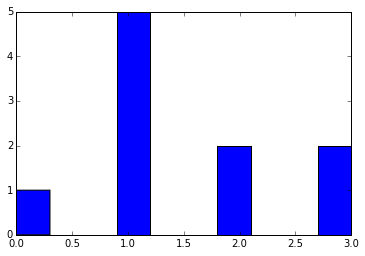

In [2]:
T = 10^5 # Number of trials
def compute_diff():
    N = np.random.randint(low=10, high=100) # no. of samples each time
    x = np.random.randint(low=1, high=10^5, size=(N, 1))
    
    x_sum_of_sqrs = np.square(x).sum()
    x_sum = x.sum()
    x_sqr_of_sum = (x_sum)^2
    
    diff = abs(x_sum_of_sqrs - (x_sqr_of_sum/(1.*N)))
    return diff
    
diffs = [compute_diff() for t in range(T)]
hist, edges = np.histogram(diffs, bins=10)
print(hist)
print(edges)
plt.hist(hist)
plt.show()


Algorithms for computing variance
==================
[wiki](http://www.wikiwand.com/en/Algorithms_for_calculating_variance)

In [3]:
# Example
# algo 1
def variance_algo_1(x):
    n, sum1, sum_sqrs = 0, 0, 0
    for xx in x:
        n += 1
        sum1     += xx
        sum_sqrs += xx*xx
    print('method 1: sum-sqrs %.2f\nmethod 1: sqr-sum1  %.2f' % (sum_sqrs, sum1*sum1/(1.*n)))
    print('method 1: sqr-sum1: %.2f' % (sum1*sum1))
    print('method 1: diff: {0}'.format((sum_sqrs - sum1*sum1/(1.*n))))
    variance = (sum_sqrs - sum1*sum1/(1.*n))/(n-1.)
    print('method 1: variance: %.8f' % (variance))

# algo 2: 2-pass variance
def variance_algo_2(x):
    n, sum1, sum2=0, 0, 0
    for xx in x:
        n+=1
        sum1 += xx
    mean1 = sum1/(1.*n)
    for xx in x:
        sum2 += (xx-mean1)*(xx-mean1)
    variance1 = sum2/(n - 1.)
    print('method 2: variance: %.8f' % (variance))
    
x_original = [4,7,13,16]
offsets = [0, 1e8, 1e9]
for offset1 in offsets:
    x = np.asarray([xx+offset1 for xx in x_original])
    print('\ndata with offset {1}: {0}'.format(x, offset1))
    variance_algo_1(x)
    variance_algo_2(x)


data with offset 0: [ 4  7 13 16]
method 1: sum-sqrs 490.00
method 1: sqr-sum1  400.00
method 1: sqr-sum1: 1600.00
method 1: diff: 90.0
method 1: variance: 30.00000000


NameError: name 'variance' is not defined

Covariance & Correlation
=============

* Let X, Y be RV with means $\mu_X \text{ and } \mu_Y$ and standard deviations $\sigma_X \text{ and } \sigma_Y$. Then  
$\operatorname{Cov}(X, Y) = \sigma(X, Y) = \mathbb{E} \left[ (X - \mu_X) ~ (Y - \mu_Y) \right]$

* Correlation $\rho$ is defined as  $\rho_{X,Y} = \rho(X,Y) = \frac{\sigma(X, Y)}{\sigma_X \sigma_Y}$

* **Alt-Forms**: $\sigma(X, Y) = \mathbb{E}(XY) - \mathbb{E}(X) \mathbb{E}(Y)$

* **Range**: $\rho(X, Y) \in [-1, 1]$

* If Y = aX + b, then   
$
\rho(X, Y) = 
\begin{cases}
    +1 & \text{a > 0} \\
    -1 & \text{a < 0} \\
     0 & \text{X and Y are independent}
\end{cases}
$




Conditional Expectation
================

**Definition**  
The conditional expectation of X given Y=y is  
$$
\mathbb{E}(X | Y=y) = 
\begin{cases}
    \sum ~ x ~ f_{X | Y}(x|y) dx & \text{discrete case}\\
    \int ~ x ~ f_{X | Y}(x|y) dx & \text{continuous case}
\end{cases}
$$

**Some more**
* Let X take values from $\mathcal{S}$ and Y from $\mathcal{T} \subseteq \mathbb{R}$

* **Regression function**  
The function $v: S \rightarrow \mathbb{R}$, defined by $v(x) = \mathbb{E}(Y | X=x)$ is called the *regression function* of Y based on X.

* It should be note that $r(X) = \mathbb{E}(Y|X)$ is not a value, but rather a function in Y.

** Fundamental Property**
1. $\mathbb{E}[r(X) \mathbb{E}(Y|X)] = \mathbb{E}[r(X)Y]$ for every function $r: \mathcal{S} \rightarrow \mathbb{R}$

**Properties**
1. **Linearity**  
  1. $\E \bigl[ (Y+Z) \mid X \bigr] = \E[Y \mid X] + \E[Z \mid X]$
  1. $\E \bigl[ aY \mid X \bigr] = a \E [ Y \mid X] $
1. **Monotonicity**  
  1. if $Y \ge 0, \text{ then } \mathbb{E}(Y|X) \ge 0$
  1. if $Y \le Z, \text{ then } \mathbb{E}(Y|X) \le \mathbb{E}(Z|X)$
  1. $ \bigl| ~ \E[Y \mid X] ~ \bigr| \le \E \left[ ~|Y|~ \mid X \right]$

**Of Transformations of RVs**  
If r(x,y) is a function of x and y, then  
$$
\mathbb{E}(r(X,Y)| Y=y) = 
\begin{cases}
    \sum ~ r(X,Y) ~ f_{X | Y}(x|y) dx & \text{discrete case}\\
    \int ~ r(X,Y) ~ f_{X | Y}(x|y) dx & \text{continuous case}
\end{cases}
$$

**Iterated Expectations**  

* **Equal means Property**   
For RVs X and Y, if the expectations exist, then $\E \bigl[ \E [Y \mid X] \bigr] = \E[Y]$.  
That is, the mean of Y and Y|X are the same.

* For any function r(x,y), we have  
$$
\E \bigl[ \E [r(X,Y) \mid X] \bigr] = \E \bigl[ r(X,Y) \bigr]
$$

**Some results**

* if $r: \mathcal{S} \rightarrow \mathbb{R}, \text{ then } Y - \mathbb{E}(Y|X)$ and r(X) are uncorrelated.  
Proof:  
  * $\E \bigl[ Y - \E[Y \mid X] \bigr] = \E[Y] - \E \bigl[ \E[Y \mid X] \bigr] = \E[Y] - \E[Y] = 0$
  * \begin{array}{llr}
      \sigma \bigl( Y−\E[Y \mid X],r(X) \bigr)
       &= \E \bigl[ \left( Y−\E(Y \mid X) \right) r(X) \bigr]
           - \E \bigl[ Y - \E[Y \mid X ] \bigr] \E[r(X)]
      & \color{gray}{\text{deftn. of covariance}}\\
      & = \E \bigl[ \left( Y−\E(Y \mid X) \right) r(X) \bigr] - 0
      & \color{gray}{\text{from the prev result}}\\
      &= \E[Yr(X)] − \E \bigl[ \E [Y \mid X ] r(X) \bigr]
      & \color{gray}{\text{fundamental property}}\\
      &=0&
    \end{array}

* $If s:\mathcal{S} \rightarrow \mathbb{R} \text{ then } \E [s(X)~ Y \mid X] = s(X)~ E[Y \mid X]$  
That is, a deterministic functions acts like a constant [?].

* **Substitution Rule**  
if $s:\mathcal{S} \times \mathcal{T} \rightarrow \mathbb{R}$, then
$\E \bigl[ s(X, Y) \mid X=x \bigr] = \E \bigl[ s(x, Y) \mid X=x \bigr] $

* if X, Y are independent, then $\E[Y \mid X] = \E[Y]$

* **Consistency**[?]  
  * $\E \bigl[ \E [Z \mid X,Y] \mid X   \bigr] = \E[Z \mid X]$  
  * $\E \bigl[ \E [Z \mid X]   \mid X,Y \bigr] = \E[Z \mid X]$

* $\sigma(X, \mathbb{E}(Y ~|~ X)) = \sigma(X, Y)$  
$\mathbb{E}(X \mid Y)$ behaves just like Y in its relationship wit X.  
Proof:  
\begin{array}{lllr}
\sigma(X, \mathbb{E}(Y ~|~ X))
&= \mathbb{E}\bigl[X ~ \mathbb{E}(Y ~|~ X)\bigr]
& - \mathbb{E}[X] ~ \mathbb{E}\bigl[\mathbb{E}(Y ~|~ X))\bigr] \hspace{1pt}
&  \color{gray}{\text{ deftn. of covariance}} \\
&= \mathbb{E}[XY]
& - \mathbb{E}[X] ~ \mathbb{E}\bigl[\mathbb{E}(Y ~|~ X))\bigr] \hspace{1pt}
&  \color{gray}{\text{ (fundamental property)}}\\
&= \mathbb{E}[XY]
& - \mathbb{E}[X] ~ \mathbb{E}[Y]
&  \color{gray}{\text{ (Equal means property)}} \\
&= \sigma(X, Y) & & 
\end{array}  


* **Of conditional probability**
  * The conditional probability of an event A, given a RV X. 
  * $\mathbb{P}(A \mid X) = \mathbb{E}(\text{1}_{A} \mid X)$
  * Then, $\mathbb{E} \bigl[ r(X) ~ \mathbb{P}(A \mid X) \bigr] = 
       \mathbb{E} \bigl[ r(X) 1_A \bigr] ~~ \forall r:\mathcal{S} \rightarrow  \mathbb{R}$

* todo: [consistency](http://www.math.uah.edu/stat/expect/Conditional.html#prp9) featuring [cond exp revisited](http://www.math.uah.edu/stat/expect/Conditional2.html),
[cov and cor](http://www.math.uah.edu/stat/expect/Covariance.html#blp)




Conditional Variance
===========
* $\mathbb{V}(Y \mid X=x) = \int (y - \mu(x))^2 ~ f(y|x) ~ dx$  
where $\mu(x) = \mathbb{E}(Y \mid X=x)$
* other deftn,  
    $\mathbb{V}(Y \mid X=x) = 
            \mathbb{E} \left( \left[Y - \mathbb{E}(Y \mid X) \right]^2 \biggm| X \right)$
* Variance in terms of exp:  
$\V(Y \mid X) = \mathbb{E} \left( Y^2 \mid X \right) - 
                            \left[\mathbb{E}(Y \mid X)\right]^2$  
  Proof:  
  \begin{array}
	\V(Y \mid X) &= \E \left( Y^2 - 
                              2 Y \E(Y \mid X) +
                              \left[\E(Y \mid X)\right]^2 \biggm| X \right)\\
    &= \E(Y^2 \mid X)
        - 2 \E \left[Y \E(Y \mid X) \mid X\right] 
        + \E\left(\left[\E(Y \mid X)\right]^2 \mid X\right) \\
	& = \E\left(Y^2 \mid X\right)
        - 2 \E(Y \mid X) \E(Y \mid X)
        + \left[\E(Y \mid X)\right]^2 \\
    &= \E\left(Y^2 \mid X\right)
        - \left[\E(Y \mid X)\right]^2
\end{array}

* **Variance**  
$\V(Y) = \E\V(Y|X) + \V\E(Y|X)$  
That is, Variance of Y is the sum of expected variance and the variance of expected conditional. This helps in compute $\V(Y)$ if we know $\P(Y \mid X)$   
*Proof*  
  \begin{array}{llr}
    \E \left[\V(Y \mid X)\right] 
    &= \E\left(Y^2\right) - \E\left(\left[\E(Y \mid X)\right]^2\right)
    & \color{gray}{\text{ Var in terms of exp}}\\
    &= \bigl(\V(Y) + \left[\E(Y)\right]^2 \bigr)
    - \E\left(\left[\E(Y \mid X)\right]^2\right)
    & \color{gray}{\text{mean of sqr - sqr of mean}}\\
    &= \V(Y) + \left[\E(Y)\right]^2
    & \\
    & \hspace{20pt} - [ \V \left[ \E(Y \mid X) \right] + 
                                \left(\E\left[\E(Y \mid X)\right]\right)^2
                      ] 
    & \color{gray}{\text{same as above}}\\
    & = \V(Y) + \left[\E(Y)\right]^2
    - (\V \left[ \E(Y \mid X) \right] + (\left[\E(Y)\right]^2))
    &\\
    & = \V(Y) - \V \left[ \E(Y \mid X) \right] &
  \end{array}
  
* **MSE**  
The mean squared error if we use $\E(Y \mid X)$ in place of Y is  
\begin{array}{llr}
\E \left( \left[Y - \E(Y \mid X) \right]^2 \right)
& = \E \left[ \V(Y \mid X) \right] &
\color{gray}{\text{Conditional variance: other deftn}}\\
& = \V(Y) - \V\left[ \E(Y \mid X) \right] &
\end{array}



In [4]:
import notebook
E = notebook.nbextensions.EnableNBExtensionApxp()
E.enable_nbextension('calico-document-tools')

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->

Examples of citations: [CITE](#cite-PER-GRA:2007) or [CITE](#cite-Papa2007).

Problems
===========

1. $X_1, \cdots, X_n \sim$ Uniform(0,1). $Y_n = \operatorname{max}\{X_1, \cdots, X_n\}$. Find $\E[Y_n]$
    * $\P(Y_n \le y) = F(y) = \P(X \le y)^n = y^n$
    * $\P(Y_n = y) = f(y) = n y^{n-1}$
    * $\E[Y_n] = \int_{0}^{1} y ~ n ~ y^{n-1} ~ dy = n \int_{0}^{1} y^n ~ dy = \frac{n}{n+1} $
    * \begin{array}{ll}
        \V[Y_n] &= \int_{0}^{1} (y-\frac{n}{n+1})^2 ~ n ~ y^{n-1} ~ dy\\
        &= \int_{0}^{1} \bigl( y^2 - \frac{2n}{n+1} y + \left( \frac{n}{n+1} \right)^2 \bigr) ~ n ~ y^{n-1} ~ dy\\
        &= n \int_{0}^{1} \bigl( y^{n+1} - \frac{2n}{n+1} y^n + \left( \frac{n}{n+1} \right)^2 y^{n-1} \bigr) ~ dy\\
        &= n \left( \frac{1}{n+2} - \frac{2n}{(n+1)^2} +\frac{n}{(n+1)^2} \right)\\
        &= n \left( \frac{1}{n+2} - \frac{n}{(n+1)^2} \right)\\
        &= n \left( \frac{n^2+2n+1 - n^2 - 2n}{(n+2)(n+1)^2} \right)\\
        &= \frac{n}{(n+2)(n+1)^2}
      \end{array}
    * $\E[Y_n^2] = \int_{0}^{1} y^2 ~ n ~ y^{n-1} ~ dy = n \int_{0}^{1} y^{n+1} ~ dy = \frac{n}{n+2}$
    * \begin{array}{llr}
        \V[Y_n] &= \E[Y_n^2] - \E[Y_n]^2 &\\
                &= \frac{n}{n+2} - \frac{n^2}{(n+1)^2} &\\
                &= n \left( \frac{1}{n+2} - \frac{n}{(n+1)^2} \right) & \color{gray}{\text{same as above}}
      \end{array}

E[y]  : expected: 0.9, actual: 0.9000779845594364 
E[y^2]: expected: 0.8181818181818182, actual: 0.8183093482435724 


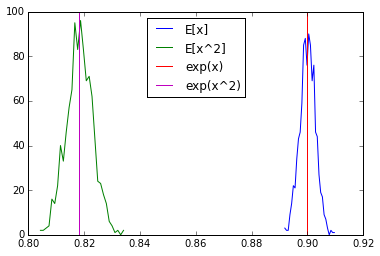

In [88]:
def show_hist(data, label, in_bins=10, plt_object=plt):
    n = data.shape[0]
    hist, edges = np.histogram(data, bins=in_bins)
    bin_centers = (edges[1:]+edges[:-1])/2.
    plt_object.plot(bin_centers, hist, label=label)

n = 9
T1, T2 = 10**3, 10**3
grand_total_x, grand_total_x_sqr = 0, 0
arr_total_x, arr_total_x_sqr = np.zeros((T1, 1)), np.zeros((T1, 1))
for t1 in range(T1):
    total_x, total_x_sqr = 0, 0
    for t2 in range(T2):
        x = np.random.rand(9, 1)
        y = np.max(x)
        total_x += y
        total_x_sqr += (y*y)
    arr_total_x[t1]    = (total_x    *1./T2)
    arr_total_x_sqr[t1]= (total_x_sqr*1./T2)
    grand_total_x     += (total_x    *1./T2)
    grand_total_x_sqr += (total_x_sqr*1./T2)
    
print('E[y]  : expected: {0}, actual: {1} '.format((n*1./(n+1)),(grand_total_x/T1)))
print('E[y^2]: expected: {0}, actual: {1} '.format((n*1./(n+2)),(grand_total_x_sqr/T1)))
show_hist(arr_total_x    , 'E[x]'  , 30)
show_hist(arr_total_x_sqr, 'E[x^2]', 30)
plt.axvline((n*1./(n+1)),c='r',label='exp(x)')
plt.axvline((n*1./(n+2)),c='m',label='exp(x^2)')
plt.legend(loc='upper center')
plt.show()

**Problem**  
A fair coin is tossed until a head is obtained. What is the expected number of tosses that will be required?
  * p = 0.5
  * $f(x) = p (1-p)^{x-1}$
  * \begin{array}{lll}
      S_{\infty}  & = \sum_{n=1}^{\infty} n ~ r^{n-1} &= 1 + 2r + 3r^2 + 4r^3 + \cdots\\
      rS_{\infty} & = \sum_{n=1}^{\infty} n ~ r^{n}   &= 0 +  r + 2r^2 + 3r^3 + \cdots\\
      S_{\infty} - rS_{\infty} & &= 1 + r + r^2 + r^3 + \cdots\\
      (1-r) S_{\infty} &= \frac{1}{1-r} &\\
      S_{\infty} & \frac{1}{(1-r)^2} &
    \end{array}
  * \begin{array}{llr}
      \E[X] &= \sum_{n=1}^{\infty} n ~ p ~ (1-p)^{n-1} &\\
            &= p ~ \sum_{n=1}^{\infty} n ~ (1-p)^{n-1} &\\
            &= p ~ \frac{1}{(1-(1-p))^2} &\\
            &= p ~ \frac{1}{p^2} &\\
            &= \frac{1}{p} &
    \end{array}
   * So in case of a fair coin, $\E[X] = 2$

**Problem**   
Let $X_1, X_2 , \cdots,X_n \sim \mathcal{N}(0,1)$.  
Let $\overline{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$.  
Plot $\overline{X}_n$ versus n for n = 1,...,10,000.  
Repeat for $X_1, X_2 , \cdots,X_n \sim \text{Cauchy}$.  
Explain why there is such a difference.  
****************************************



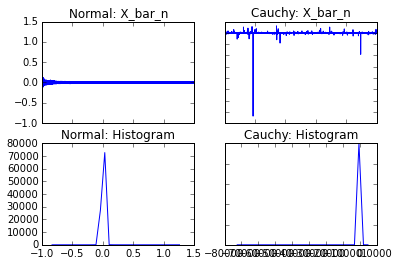

In [104]:
N = 10**3
x_n_bar_normal, x_n_bar_cauchy = np.zeros((N,1)), np.zeros((N,1))
for n in range(N):
    x = np.random.normal(0,1,(n+1,1))
    x_n_bar_normal[n] = np.average(x)
    
    x = np.random.standard_cauchy(n+1)
    x_n_bar_cauchy[n] = np.average(x)

f, axarr = plt.subplots(2, 2)

axarr[0, 0].plot(x_n_bar_normal)
axarr[0, 0].set_title('Normal: X_bar_n')

axarr[0, 1].plot(x_n_bar_cauchy)
axarr[0, 1].set_title('Cauchy: X_bar_n')

show_hist(x_n_bar_normal, label='Normal', in_bins=30, plt_object=axarr[1,0])
axarr[1, 0].set_title('Normal: Histogram')

show_hist(x_n_bar_cauchy, label='Cauchy', in_bins=30, plt_object=axarr[1,1])
axarr[1, 1].set_title('Cauchy: Histogram')

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.title('́Effects of tail')
plt.show()

[Exponential distribution](2-random-variables.ipynb#Exponential-distribution)

$f(x) = \lambda e^{-\lambda x}$

\begin{array}{ll}
              u = x  & dv = e^{-\lambda x} dx
         \end{array}

\begin{array}{llr}
\E[X] &= \int_{0}^{\infty} x \lambda  e^{-\lambda x} dx =\lambda \int_{0}^{\infty} x e^{-\lambda x} dx &\\
u = x  &  dv = e^{-\lambda x} dx & \\
du =dx & v  = -\frac{1}{\lambda} e^{-\lambda x} &\\
\E[X] &=  \lambda \left(   \left[ x \left( -\lambda e^{-\lambda x} \right) \right]_{0}^{\infty} -
                        \left( \int_{0}^{\infty} -\frac{1}{\lambda} e^{-\lambda x} dx \right)
                   \right) & \\
      &=  \int_{0}^{\infty} e^{-\lambda x} dx &\\
      &= \left[  \frac{e^{-\lambda x}}{-\lambda} \right]_{0}^{\infty} & \\
      &= \frac{1}{\lambda}&
\end{array}

**Problem**

$X \sim \mathcal{N}(0,1)$  $\E[X] = 0, \V[X] = 1$  

$Y = e^X$  


\begin{array}{ll}
\E[Y] = \E[e^X] &= \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{\infty} e^x ~ e^{-x^2/2} dx 
= \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{\infty} e^{x-x^2/2} dx\\
&= e^{1/2} \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{\infty} e^{(x-1)^2/2} dx\\
&= e^{1/2} = \sqrt{e}
\end{array}

$$
\color{gray}{x - \frac{x^2}{2}
= -\frac{1}{2} \left( x^2 - x \right)
= -\frac{1}{2} \left( x^2 - x + 1 - 1 \right)
= -\frac{1}{2} \left( x - 1 \right)^2 + \frac{1}{2}}\\
$$

\begin{array}{ll}
\V[Y] = \V[e^X] &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} (e^x - e^{1/2})^2 e^{-x^2/2} dx\\
&= \frac{1}{\sqrt{2\pi}} \bigl(
\int_{-\infty}^{\infty} e^{2x - x^2/2} dx
- 2 e^{1/2} \int_{-\infty}^{\infty} e^{x-x^2/2} dx
+ e \int_{-\infty}^{\infty} e^{-x^2/2} dx
\bigr)\\
&= 
e^2
- 2 e^{1/2} (e^{1/2})
+ e (1)\\
&= e^2 - e
\end{array}

$$
\color{gray}{
2x - x^2/2 = -\frac{1}{2} (x^2 - 4x) = -\frac{1}{2} (x-2)^2 + 2}
$$

**Second way**  

From [stack overflow](http://stats.stackexchange.com/a/89973)

Using moment generating functions.  
$\phi_X(t) = \E \left[ e^{Xt} \right] = \int e^{xt} dF(x)$.  
Also, $\phi_X^{(k)}(x) = \E[X^k]$  

For normal distribution, $\phi_X(t) = \exp \left( \mu t + \frac{\sigma^2 t^2}{2} \right)$

For $\mathcal{N}(0,1), ~ \phi_X(t) = \exp \left( \frac{t^2}{2} \right)$

We need to find $\E[e^X]$ and $\V[e^X]$.
Now $\E[e^X] = \phi_X(1) =  \exp \left( \frac{1}{2} \right) = \sqrt{e}$  
$\E[Y^2] = \E[e^{2X}] = \phi_X(2) = e^2$  
Thus, 
$\V[e^X] = \E[X^2] - \E[X]^2 = e^2 - e$

**Problem**

Let $Y$ be such that $\P(Y=1) = \P(Y=-1) = \frac{1}{2}$. Let $X = \sum_{i=1}^{N} Y_i$. Find $\E[X], \V[X]$.

--------------------------

$\E[Y]   = \frac{1}{2}(+1) + \frac{1}{2}(-1) = 0$  
$\E[Y^2] = \frac{1}{2}(+1) + \frac{1}{2}(+1) = 1$  

$\E[X] = \E[\sum_{i=1}^{n} Y_i] = \sum_{i=1}^{n} \E [Y_i] = \sum_{i=1}^{n} \E[Y] = 0$  
$\E[X^2] = \E[ \left( \sum_{i=1}^{n} Y_i \right)^2]
= n \E\left[ Y^2 \right] + 2 \frac{n(n-1)}{2} \E[Y]^2
= n$   

$\V[X] = \E \left[ X^2 \right] - \E[X]^2 = n - 0 = n$



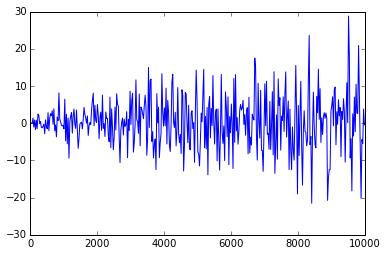

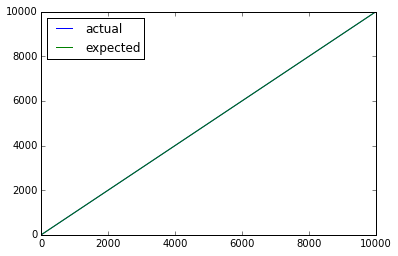

In [184]:
T1, T2 = 10**1, 10**1
N, n_step = 10**4, 25
exp_x, exp_x_sqr = np.zeros((int(N/n_step),1)), np.zeros((int(N/n_step),1))
for n in range(0, N, n_step):
    ix_n = int(n/n_step)
    for t1 in range(T1):
        y = np.random.randint(2, size=(T2,n))*2 - 1
        #exp_x_t1 = np.sum(y, axis=1)
        #tmp = np.sum(exp_x_t1)
        tmp_x, tmp_x_sqr = np.sum(y), np.sum(np.square(y))
        exp_x[ix_n] += (tmp_x/T2)
        exp_x_sqr[ix_n] += (tmp_x_sqr/T2)

exp_x /= T1
exp_x_sqr /= T1
x = range(0, N, n_step)
plt.plot(x, exp_x)
plt.show()

plt.plot(x, exp_x_sqr, label='actual')
plt.plot(x, x, label='expected')
plt.legend(loc='upper left')
plt.show()


Feynman's Restaurant problem
-----------------------------


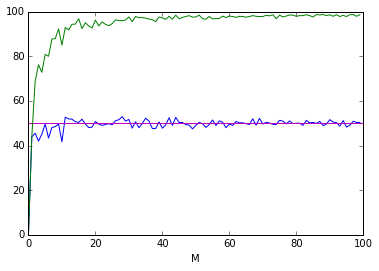

In [228]:
N = 100
T = 10
y_exp, y_max = np.zeros((N,1)), np.zeros((N,1))
for M in range(1, N):
    y = np.random.randint(low=1,high=N,size=(T,M))
    y_sum = np.sum(y, axis=0)/(1.*T)
    #print(y)
    y_mx = np.max(y, axis=1)
    #print(y_max)
    y_exp[M] = np.sum(y_sum/M)
    y_max[M] = np.average(y_mx)

#print(y_max[:-10].transpose())

plt.plot(y_exp)
plt.axhline((N/2.),c='m',label='exp(x^2)')
plt.plot(y_max)
plt.xlabel('M')
plt.show()

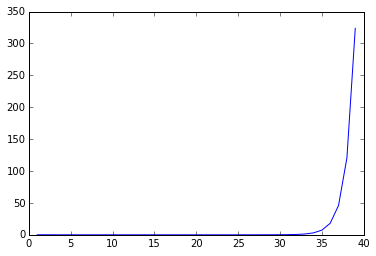

In [233]:
def show_exp_y_1(n, d):
    numtr = d*(d**(d+1) - 1)
    dentr = (d+1) * (n**(d-1))
    return numtr*1.0/dentr

def show_exp_y_2(n, d):
    factor1 = d*1.0/(n**(d-1))
    series1 = [y**d for y in range(1,d)]
    return factor1 * sum(series1)
n=40
d=range(1,n)
plt.plot(d, [show_exp_y_2(n, dd) for dd in d])
plt.show()

In [267]:
x = np.random.randint(50, size=(7,4))
print(x)
print('')
print(np.sum(x, axis=0))
print(np.max(x, axis=1))

[[48 34 39  2]
 [18  5 37  3]
 [15 36 43 27]
 [13 25  7 35]
 [20 12 35 14]
 [48 13 29 25]
 [18 21 21  3]]

[180 146 211 109]
[48 37 43 35 35 48 21]


Conditional Exp, Variance
---------------------------
Suppose we generate a random variable X in the following way. First we flip a fair coin. If the coin is heads, take X to have a Unif(0,1) distribution. If the coin is tails, take X to have a Unif(3,4) distribution.
(a) Find the mean of X.
(b) Find the standard deviation of X.

Solution:  

(a)
\begin{array}{llr}
\E[X \mid Y=y] &= \sum_{x_i \in R_{X}} x_i \P_{X \mid Y} ~ (x_i \mid y)&\\
\E[X] &= \E \bigl[ \E \left[ X \mid Y \right] \bigr]&\\
      &= \sum_{y_i} \E \left[ X \mid Y \right] ~ \P(y_i) &\\
\E[X \mid Y=H] &= \E[U(0,1)] = 0.5 &\\
X^{\prime} &= U(3,4) = 3 + U(0,1)&\\
\E[X \mid Y=T] &= \E[U(3,4)] = 3.5&\\
\E[X] &= \sum_{Y} ~\E[X,Y] &\\
      &= \sum_{Y} ~\E[X \mid Y] ~\P[Y]  &\\
      &= \frac{1}{2} \E[U(0,1)] + \frac{1}{2} \E[U(3,4)] &\\
      &= 2.0 &
\end{array}

(b)  
\begin{array}{llr}
\V[X] &= \E \V [X \mid Y] + \V \E [X \mid Y] &\\
\V[X \mid Y] &= 0.5 & \color{gray}{\text{irrespective of whether Y is H or T}}\\
\Rightarrow \E \V[X \mid Y] = \frac{1}{12}\\
\V \E[X \mid Y] &= \E \left[ \left( \E[X \mid Y] - \E[\E[X \mid Y]] \right)^2  \right]\\
&= \E \left[ \left( \E[X \mid Y] - \E[X] \right)^2  \right]\\
&=  P(Y=H)\left( \E[X \mid Y] - 2.0 \right)_{Y=H}^2+ 
    P(Y=T)\left( \E[X \mid Y] - 2.0 \right)_{Y=H}^2  \\
&= \frac{1}{2} \left( 0.5 - 2 \right)^2 +
   \frac{1}{2} \left( 3.5 - 2 \right)^2 \\
&= \left( \frac{3}{2} \right)^2 = 2.25\\
\V[X] = 2.25 + .083  = 2.33
\end{array}

avg E[X] :: expected: 2.0  actual:  1.99999553145
avg E[X] :: expected: 2.33  actual:  2.33371301533


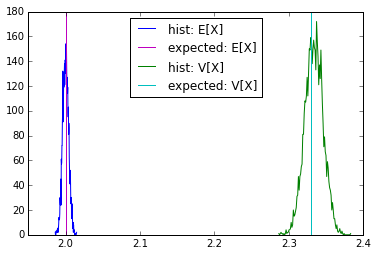

In [291]:
T1 = T2 = 5*10**3
x_mean_t1 = np.zeros((T1,1))
x_var_t1 = np.zeros((T1,1))
for t1 in range(T1):
    x = np.random.randint(low=0, high=2,size=(T2,1))
    in_heads = np.sum(x)
    in_tails = T2 - in_heads
    
    x_heads = np.random.rand(in_heads)
    x_tails = np.random.rand(in_tails)+3.
    
    mean_heads = np.average(x_heads)
    mean_tails = np.average(x_tails)
    
    mean_t2 = (mean_heads+mean_tails)/2.
    
    x_diff_heads = np.square(x_heads - mean_t2)
    x_diff_tails = np.square(x_tails - mean_t2)
    var_t2 = (np.sum(x_diff_heads) + np.sum(x_diff_tails))/(T2-1)
    
    x_mean_t1[t1] = mean_t2
    x_var_t1[t1] = var_t2
    
show_hist(x_mean_t1,label='hist: E[X]',in_bins=10**2)
plt.axvline(2.0,color='m',label='expected: E[X]')
show_hist(x_var_t1,label='hist: V[X]',in_bins=10**2)
plt.axvline(2.33,color='c',label='expected: V[X]')
plt.legend(loc='upper center')
print('avg E[X] :: expected:', 2.0, ' actual: ', np.average(x_mean_t1))
print('avg E[X] :: expected:', 2.33
      , ' actual: ', np.average(x_var_t1))
plt.show()